# Zero To Hero Big Data Prepration
Taking Advantage of Cloud Technologies to Create Big Data Solutions
    
    AUTHOR: Dr. Roy Jafari 

### Chapter 3: Data Solution Life Cycle (DSLC)

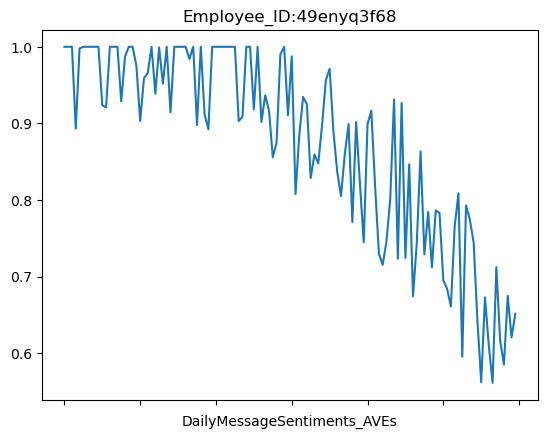

In [1]:
# Drawing Figure 3.4

import pandas as pd
import matplotlib.pyplot as plt

employee_df = pd.read_csv('https://www.dropbox.com/s/kplkzzzemip49js/employee_simulated.csv?dl=1')

y = employee_df.loc[0,'DailyMessageSentiments_AVE_day0':'DailyMessageSentiments_AVE_day119']
ax = y.plot()
ax.set_xticklabels([])
ax.set_xlabel('DailyMessageSentiments_AVEs')
ax.set_title(f'Employee_ID:{employee_df.loc[0,"Employee_ID"]}')
plt.savefig(f'images/DailyMessageSentiments_AVEs_Employee_ID_{employee_df.loc[0,"Employee_ID"]}.png',dpi=500)

In [3]:
# Drawing Figure 3.5

import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
import matplotlib.pyplot as plt

def r2(y,y_fit):
    TSS = (y**2).sum()
    RSS = ((y-y_fit)**2).sum()
    return 1- RSS/TSS

def func1par(x,p1):
    return p1 + x*0

def func2par(x,p1,p2):
    return p1 + p2*x

def func3par(x,p1,p2,p3):
    return p1 + p2*x + p3*x**2

funcs = [func1par,func2par,func3par]

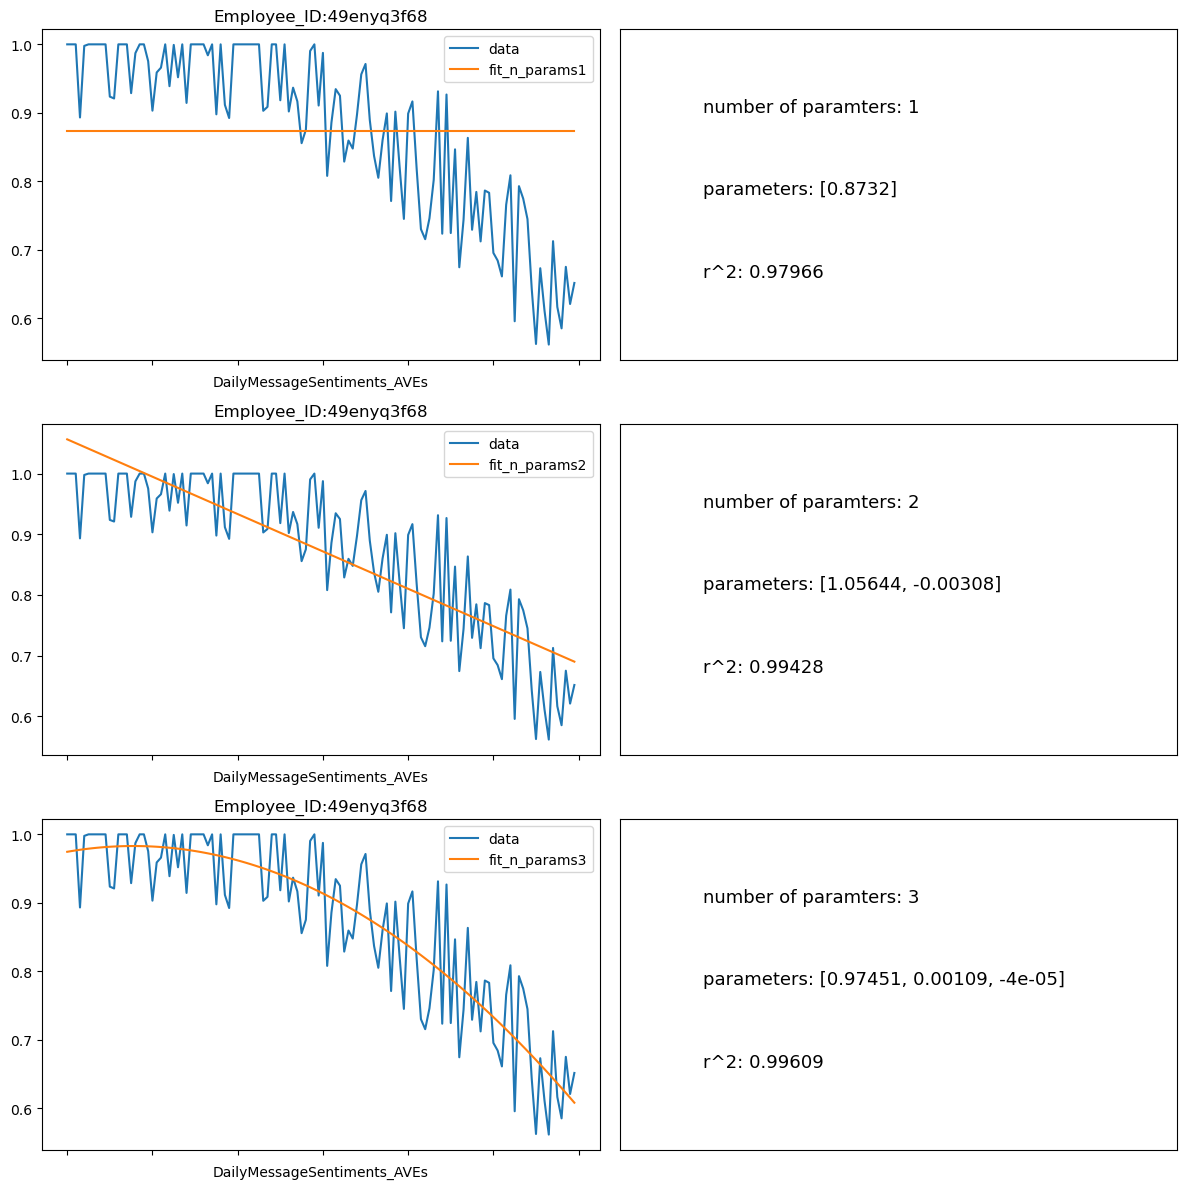

In [4]:
#employee_df = pd.read_csv('https://www.dropbox.com/s/kplkzzzemip49js/employee_simulated.csv?dl=1')

y = employee_df.loc[0,'DailyMessageSentiments_AVE_day0':'DailyMessageSentiments_AVE_day119']
x = np.arange(len(y))

fig,axs = plt.subplots(3,2,figsize=(12,12))

for i in range(3):
    ps, _ = curve_fit(funcs[i], x, y)
    
    if i == 0:
        y_fit = funcs[i](x,ps[0])
    if i == 1:
        y_fit = funcs[i](x,ps[0],ps[1])
    if i == 2:
        y_fit = funcs[i](x,ps[0],ps[1],ps[2])
        
    r2_score = r2(y,y_fit)
    
    ax = axs[i,0]
    
    y.plot(label='data',ax=ax)
    ax.plot(x,y_fit, label=f'fit_n_params{i+1}')
    
    ax.set_xticklabels([])
    ax.set_xlabel('DailyMessageSentiments_AVEs')
    ax.set_title(f'Employee_ID:{employee_df.loc[0,"Employee_ID"]}')
    ax.legend()
    
    ax = axs[i,1]
    
    
    ax.annotate(xy=(0.15,0.75),text=f'number of paramters: {i+1}',size=13)
    ax.annotate(xy=(0.15,0.5),text=f'parameters: {str([np.round(p,5) for p in ps])}',size=13)
    ax.annotate(xy=(0.15,0.25),text=f'r^2: {np.round(r2_score,5)}',size=13)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.savefig(f'images/Feature_Extraction_Employee_ID_{employee_df.loc[0,"Employee_ID"]}.png',dpi=500)
    

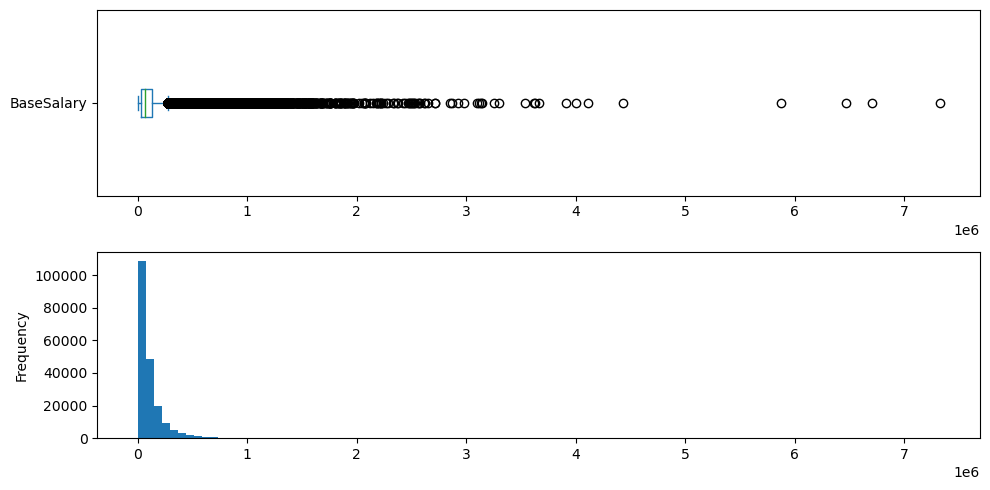

In [5]:
# Drawing Figure 3.6
import pandas as pd
import matplotlib.pyplot as plt

#employee_df = pd.read_csv('https://www.dropbox.com/s/kplkzzzemip49js/employee_simulated.csv?dl=1')

fig,axes = plt.subplots(2,1, figsize=(10,5))

ax = axes[0]
employee_df.BaseSalary.plot.box(vert=False,ax=ax)

ax = axes[1]
employee_df.BaseSalary.plot.hist(bins=100)

plt.tight_layout()

plt.savefig(f'images/base_salary_boxplot_histogram.png',dpi=500)

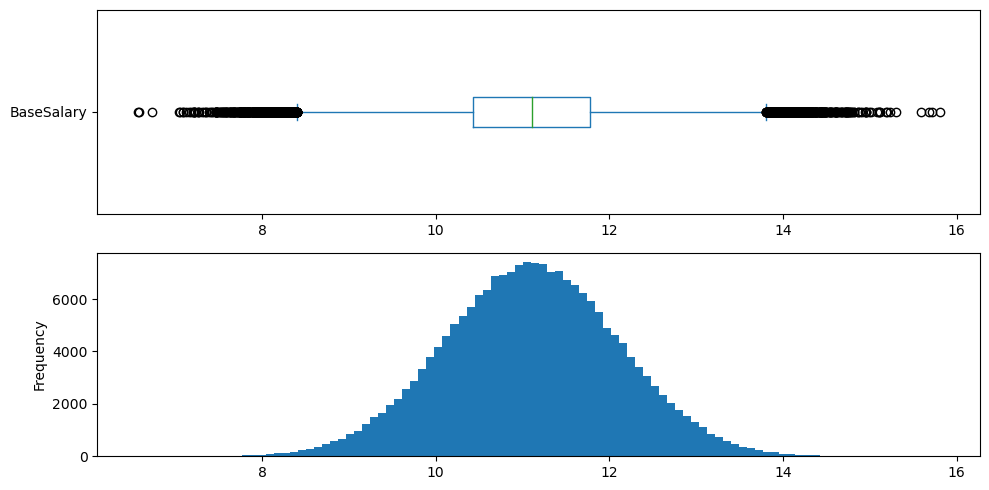

In [6]:
# Drawing Figure 3.7
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#employee_df = pd.read_csv('https://www.dropbox.com/s/kplkzzzemip49js/employee_simulated.csv?dl=1')

fig,axes = plt.subplots(2,1, figsize=(10,5))

ax = axes[0]
np.log(employee_df.BaseSalary).plot.box(vert=False,ax=ax)

ax = axes[1]
np.log(employee_df.BaseSalary).plot.hist(bins=100)

plt.tight_layout()

plt.savefig(f'images/base_salary_log_transformed_boxplot_histogram.png',dpi=500)

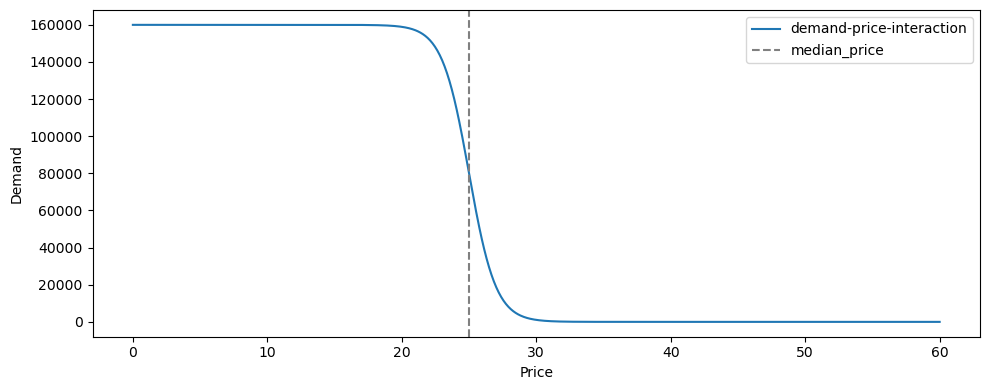

In [7]:
# Drawing Figure 3.11
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def demand_per_price(p,market_cap,median_price):
    return market_cap/(1+np.exp(p - median_price))

market_cap = 160000
median_price = 25

p = np.linspace(0,60,1000)
demand = demand_per_price(p,market_cap,median_price)
plt.figure(figsize=(10,4))
plt.plot(p,demand,label='demand-price-interaction')
plt.axvline(median_price, c='gray',linestyle='--',label='median_price')
plt.ylabel('Demand')
plt.xlabel('Price')
plt.legend()
plt.tight_layout()
plt.savefig(f'images/demand-price-interaction-example.png',dpi=500)

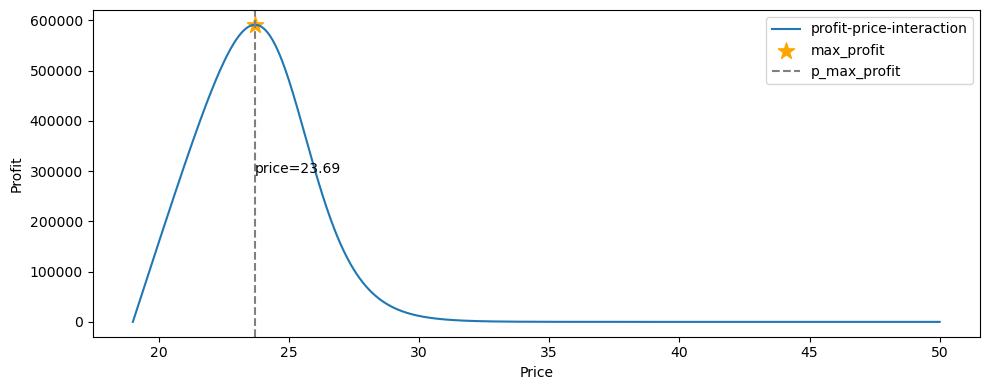

In [8]:
# Drawing Figure 3.12
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def demand_per_price(p,market_cap,median_price):
    return market_cap/(1+np.exp(p - median_price))

def profit_per_price(p,market_cap,median_price,cost):
    return demand_per_price(p,market_cap,median_price)* (p-cost)
    

market_cap = 160000
median_price = 25
cost = 19

p = np.linspace(cost,median_price*2,1000)
profit = profit_per_price(p,market_cap,median_price,cost)

p_max_profit = p[np.argmax(profit)]
max_profit = np.max(profit)
plt.figure(figsize=(10,4))
plt.plot(p,profit,label='profit-price-interaction')
plt.scatter(x=p_max_profit, y = max_profit,c='orange',marker='*',s=150,label='max_profit')
plt.axvline(p_max_profit, c='gray',linestyle='--',label='p_max_profit')
plt.annotate(xy=(p_max_profit,max_profit/2),text=f'price={np.round(p_max_profit,2)}')

plt.ylabel('Profit')
plt.xlabel('Price')
plt.legend()
plt.tight_layout()
plt.savefig(f'images/profit-price-interaction-example.png',dpi=500)